In [23]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
from collections import defaultdict
sys.path.append("../4ncnn")
from data_utils import preprocess_sample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
BASE_DIR = "/mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset/230212_stack6_extracted"
LABELS = ["mitotic", "new_daughter", "stable", "death"]
NUM_SAMPLES_PER_LABEL = 10


In [31]:
def plot_grid(images, ncols=4, label=None):
    nrows = (len(images) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axs = axs.flatten()
    for i, img in enumerate(images):
        axs[i].imshow(np.mean(img, axis=0), cmap='gray')
        axs[i].axis('off')
        if i == 0:
            axs[i].set_title(label, fontsize=10)
    for i in range(len(images), len(axs)):
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

In [32]:
# Find random labels
datapoints = defaultdict(list)

for label in LABELS:
    label_dir = os.path.join(BASE_DIR, label)
    if not os.path.exists(label_dir):
        print(f"Directory {label_dir} does not exist.")
        continue
    
    files = [f for f in os.listdir(label_dir)]
    if not files:
        print(f"No files found in {label_dir}.")
        continue

    datapoints[label] = np.random.choice(files, NUM_SAMPLES_PER_LABEL, replace=False)


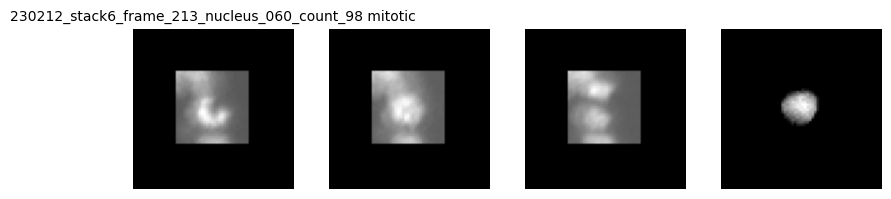

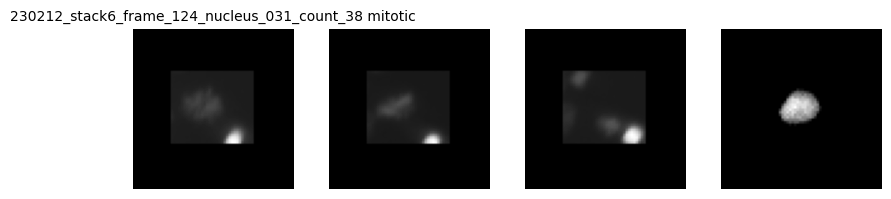

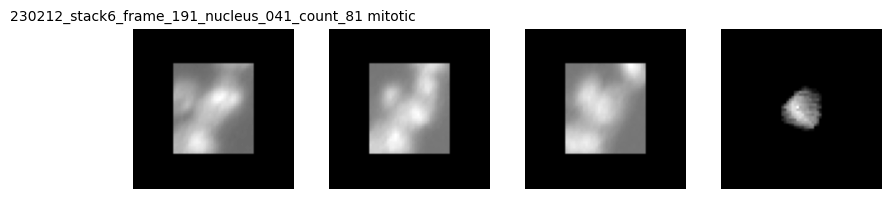

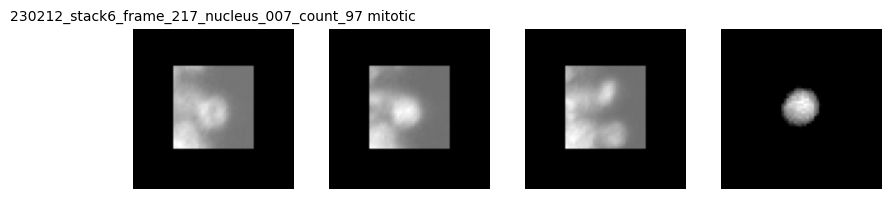

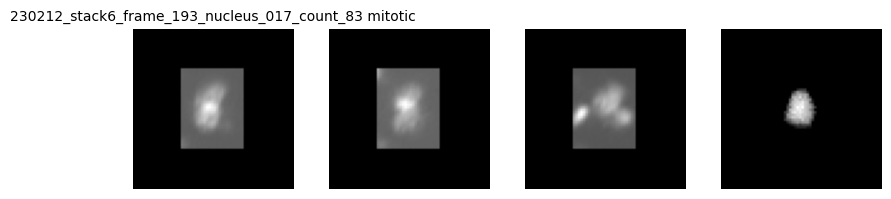

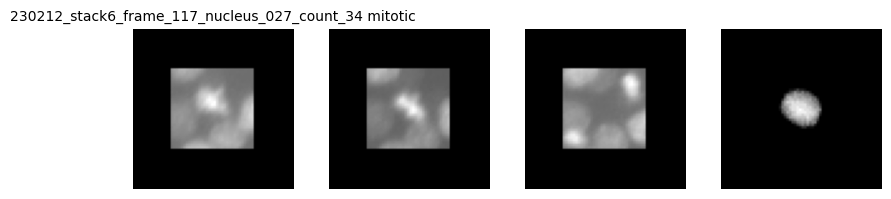

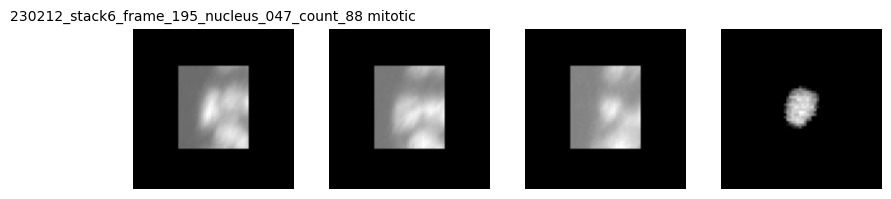

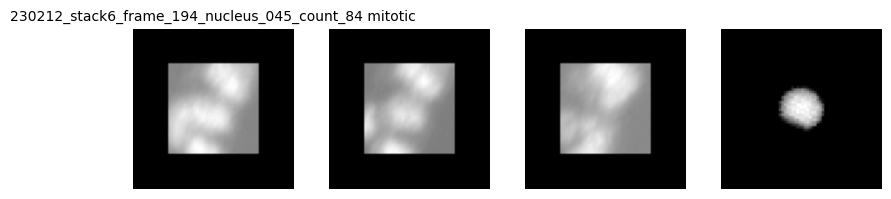

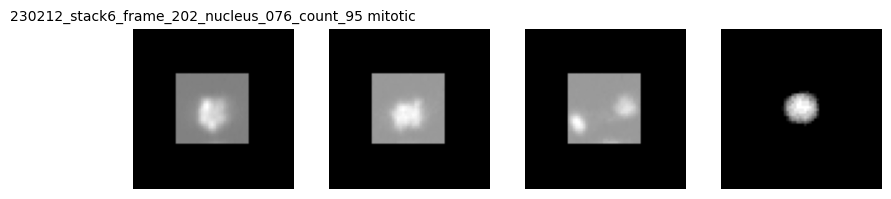

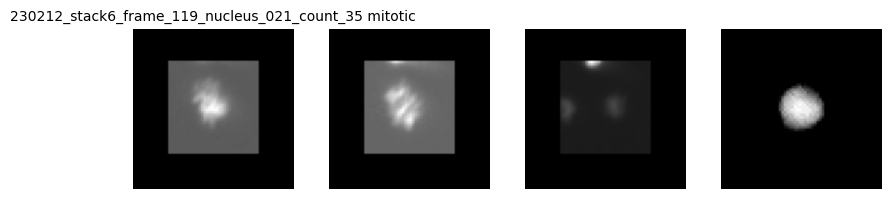

In [34]:
# MITOTIC
for file_path in datapoints["mitotic"]:
    folder_path = os.path.join(BASE_DIR, "mitotic", file_path)
    tensor = preprocess_sample(
        folder_path=folder_path, save_analysis=False,
    )
    
    tensor = tensor.numpy().astype(np.float32)
    tensor = tensor.squeeze(0)  # Remove batch dimension

    plot_grid(tensor, ncols=4, label=f"{file_path} {'mitotic'}")

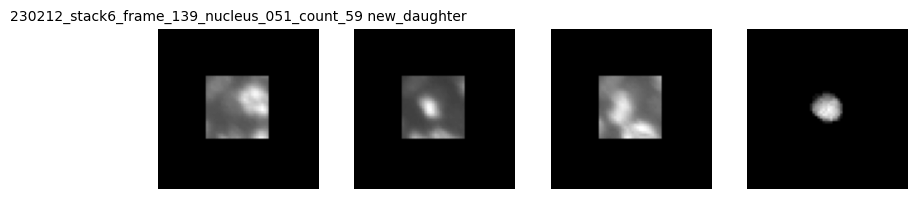

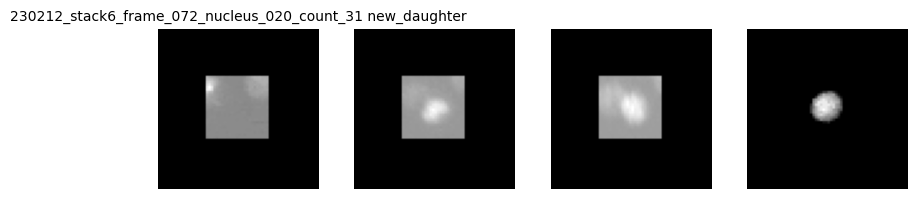

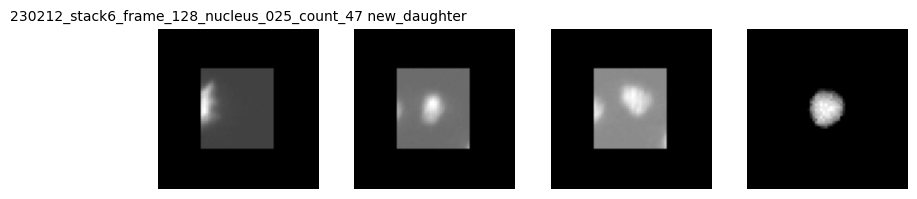

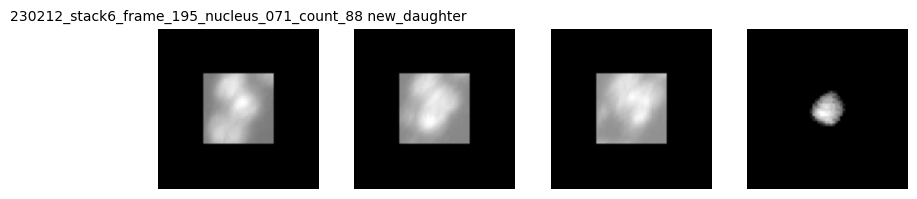

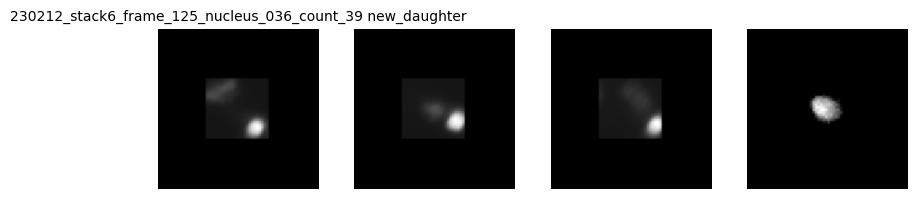

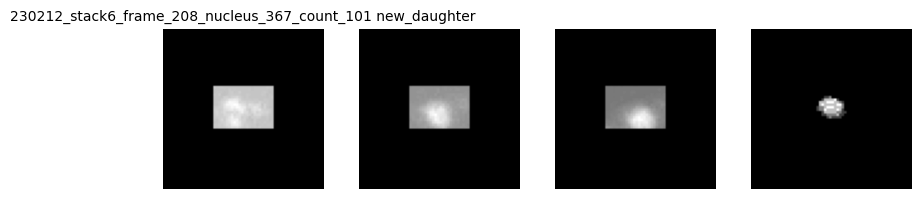

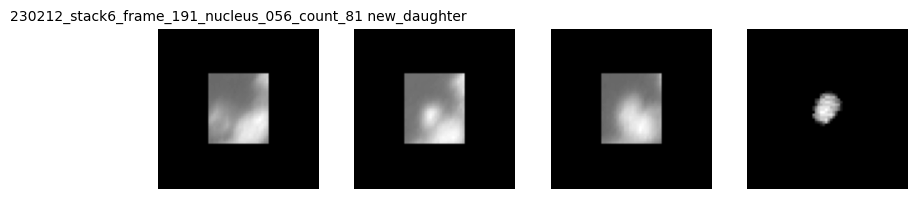

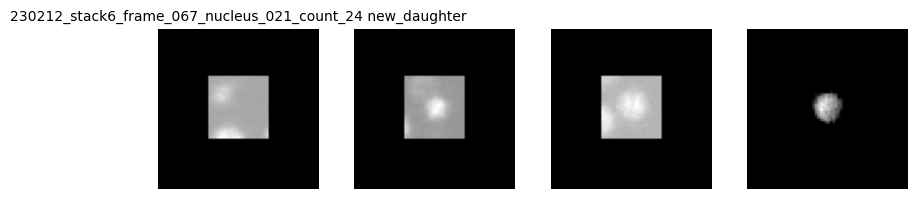

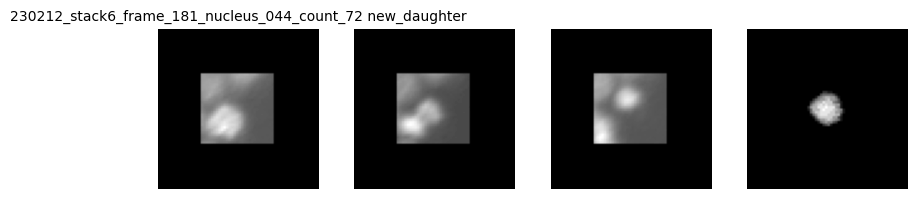

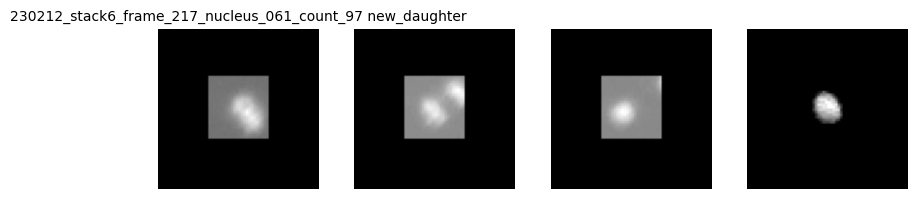

In [35]:
# NEW DAUGHTER
for file_path in datapoints["new_daughter"]:
    folder_path = os.path.join(BASE_DIR, "new_daughter", file_path)
    tensor = preprocess_sample(
        folder_path=folder_path,
        save_analysis=False,
    )

    tensor = tensor.numpy().astype(np.float32)
    tensor = tensor.squeeze(0)  # Remove batch dimension

    plot_grid(tensor, ncols=4, label=f"{file_path} {'new_daughter'}")

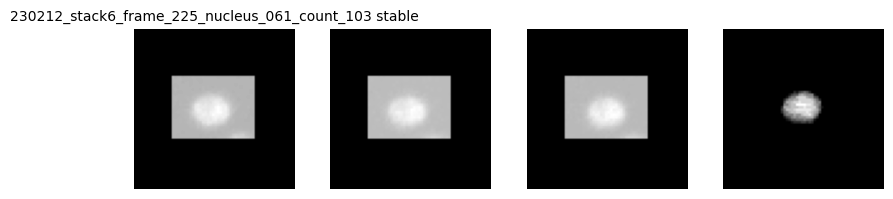

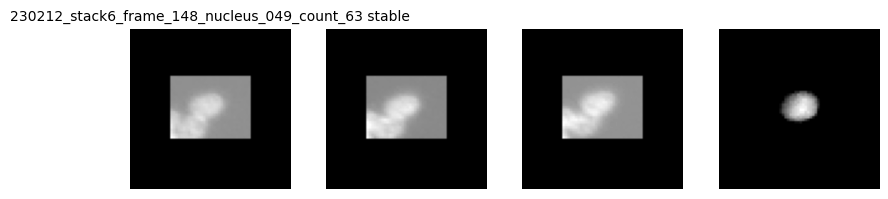

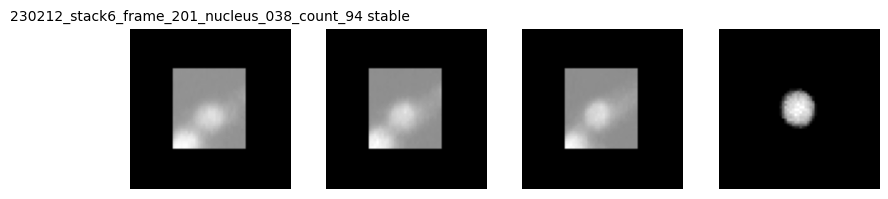

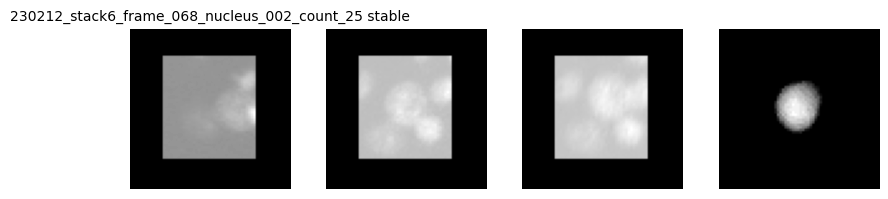

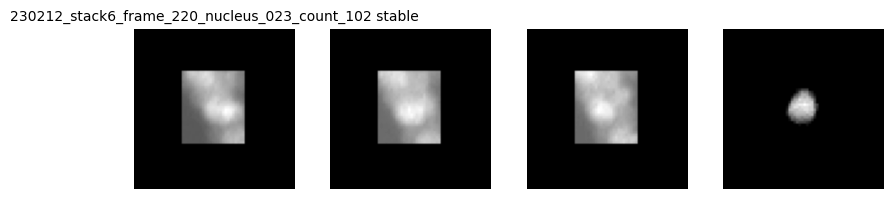

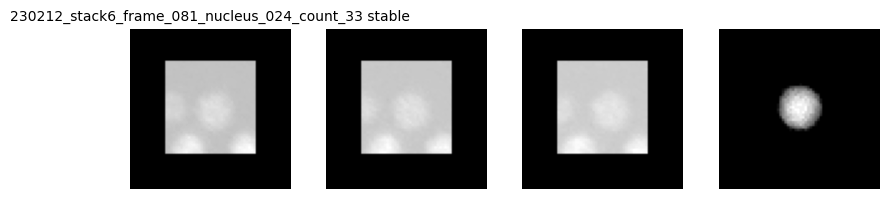

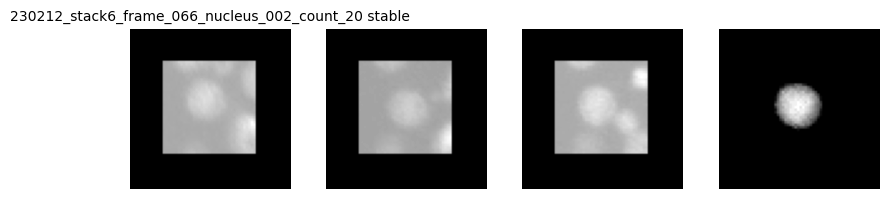

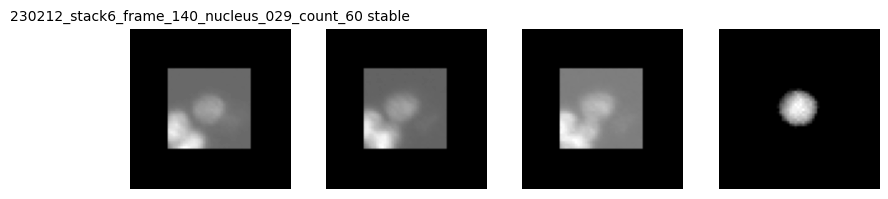

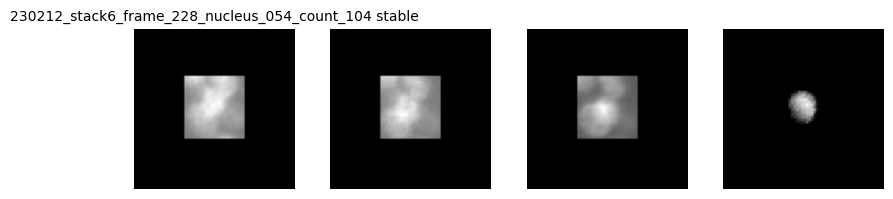

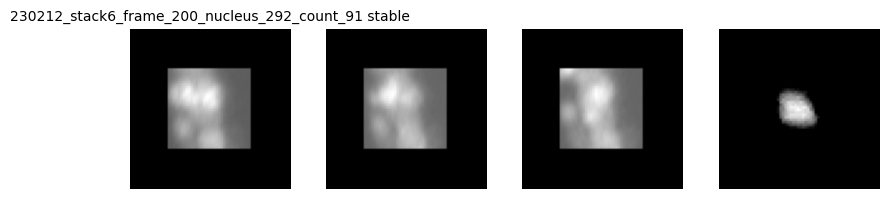

In [36]:
# STABLE
for file_path in datapoints["stable"]:
    folder_path = os.path.join(BASE_DIR, "stable", file_path)
    tensor = preprocess_sample(
        folder_path=folder_path,
        save_analysis=False,
    )

    tensor = tensor.numpy().astype(np.float32)
    tensor = tensor.squeeze(0)  # Remove batch dimension

    plot_grid(tensor, ncols=4, label=f"{file_path} {'stable'}")

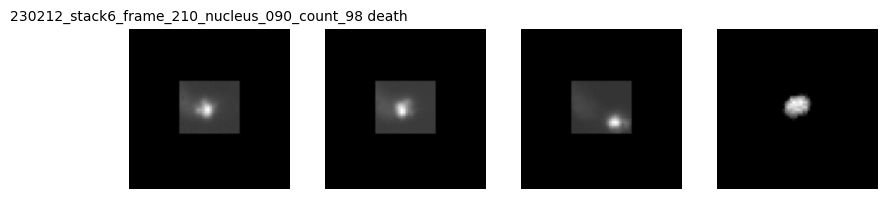

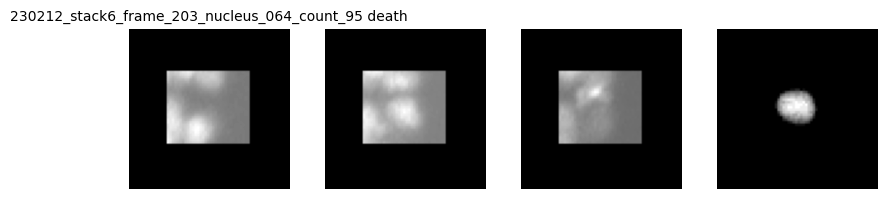

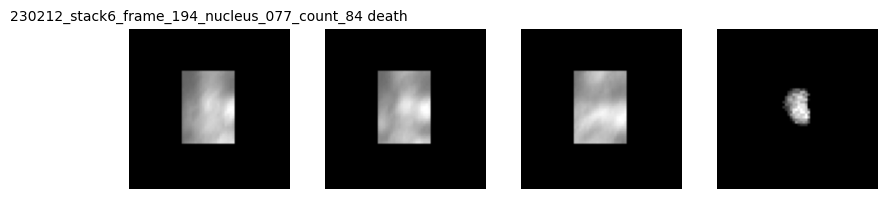

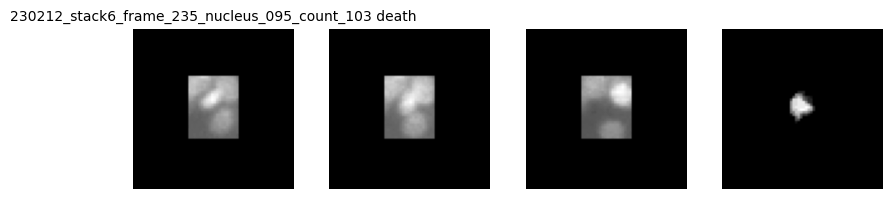

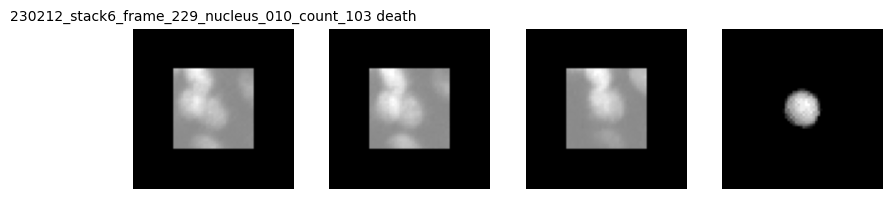

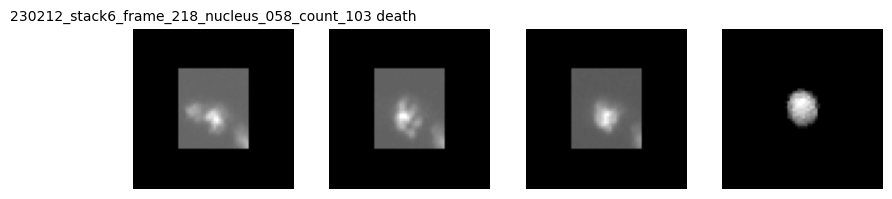

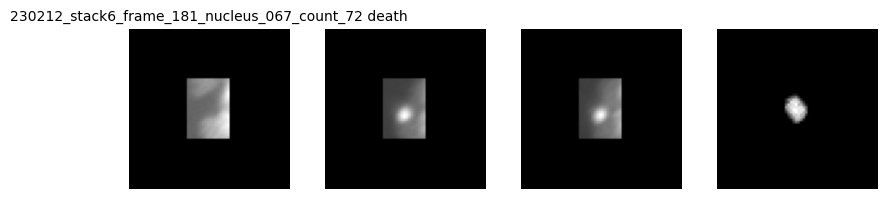

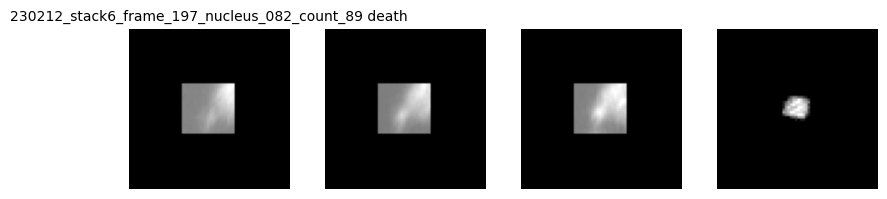

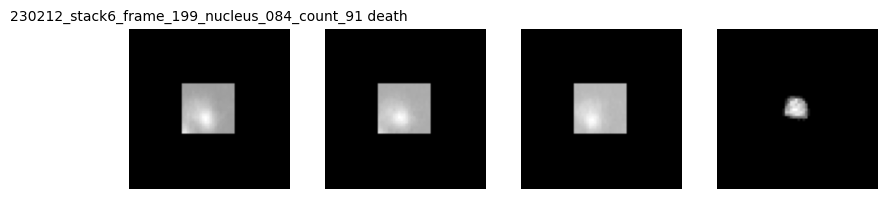

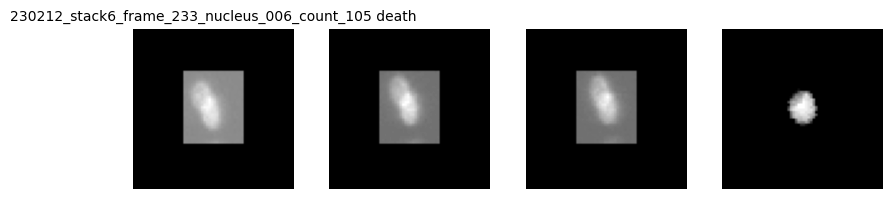

In [37]:
# DEATH
for file_path in datapoints["death"]:
    folder_path = os.path.join(BASE_DIR, "death", file_path)
    tensor = preprocess_sample(
        folder_path=folder_path,
        save_analysis=False,
    )

    tensor = tensor.numpy().astype(np.float32)
    tensor = tensor.squeeze(0)  # Remove batch dimension

    plot_grid(tensor, ncols=4, label=f"{file_path} {'death'}")